<a href="https://colab.research.google.com/github/ZawWin58/firstproject/blob/master/lab-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow==1.4

     |████████████████████████████████| 41.2MB 101kB/s 
     |████████████████████████████████| 1.7MB 21.3MB/s 
     |████████████████████████████████| 890kB 45.7MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=5ddd4477f73fd840d4555bcdf4b4b4b92c5c1b814867fc36379d83c0b0846a9d
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.4
    Uninstalling bleach-3.1.4:
      Successfully uninstalled bleach-3.1.4
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
import tensorflow as tf 
from tensorflow.python.keras.datasets import cifar10
import numpy as np 
import time
import os
import matplotlib.pyplot as plt
import pickle


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [0]:
class CifarLoader(object):
    def __init__(self, source_files):
        self._source = source_files
        self._i = 0
        self.images = None
        self.labels = None

    def load(self):
        data = [unpickle(f) for f in self._source]
        images = np.vstack([d["data"] for d in data])
        n = len(images)
        self.images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1).astype(float) / 255
        self.labels = one_hot(np.hstack([d["labels"] for d in data]), 10)
        return self

    def next_batch(self, batch_size):
        x, y = self.images[self._i:self._i+batch_size], self.labels[self._i:self._i+batch_size]
        self._i = (self._i + batch_size) % len(self.images)
        return x, y


In [0]:
Data_path= "/content/drive/My Drive/cifar-10-batches-py"
Log_DIR="/Users/zawwinhtoo/master/lab4 /"

In [0]:
def unpickle(file):
  with open(os.path.join(Data_path,file),'rb') as fo:
    dict= pickle.load(fo,encoding='latin1')
  return dict


def one_hot(vec, vals=10):
  n=len(vec)
  out=np.zeros((n,vals))
  out[range(n),vec]=1
  return out

In [0]:
class CifarDataManager(object):
    def __init__(self):
        self.train = CifarLoader(["data_batch_{}".format(i) 
            for i in range(1, 6)]).load()
        self.test = CifarLoader(["test_batch"]).load()

In [0]:
d=CifarDataManager()
print("Number of train images: {}".format(len(d.train.images)))
print("Number of train labels: {}".format(len(d.train.labels)))
print("Number of test images: {}".format(len(d.test.images)))
print("Number of test labels: {}".format(len(d.test.labels)))

Number of train images: 50000
Number of train labels: 50000
Number of test images: 10000
Number of test labels: 10000


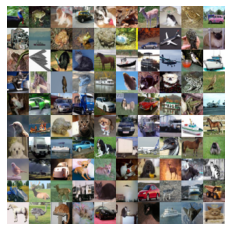

In [0]:
images=d.train.images
n=len(images)
plt.figure
plt.gca().set_axis_off()
im=np.vstack([np.hstack([images[np.random.choice(n)]for i in range(10)])
for i in range(10)])
plt.imshow(im)
plt.show()

In [0]:

def weight_variable (shape ):
  initial = tf.truncated_normal(shape , stddev =0.1) 
  return tf.Variable(initial)

def bias_variable (shape ):
  initial = tf.constant (0.1 , shape=shape) 
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides =[1, 1, 1, 1], padding="SAME")

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize =[1, 2, 2, 1],
                        strides =[1, 2, 2, 1], padding="SAME")

def conv_layer(input , shape ):
  W = weight_variable (shape) 
  b = bias_variable ([ shape [3]]) 
  return tf.nn.relu(conv2d(input , W) + b)

def full_layer(input , size ):
  in_size = int(input.get_shape ()[1]) 
  W = weight_variable ([ in_size , size ]) 
  b = bias_variable ([ size ]) 
  return tf.matmul(input , W) + b


def variable_summaries(var):
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)

In [0]:
cifar=CifarDataManager()
tf.reset_default_graph ()

x = tf.placeholder(tf.float32 , shape =[None , 32,32,3]) 
y_ = tf.placeholder(tf.float32 , shape =[None , 10]) 
keep_prob = tf.placeholder(tf.float32)



In [0]:

with tf.name_scope('conv1'):
  conv1 = conv_layer(x, shape =[5, 5, 3, 32]) 
  conv1_pool = max_pool_2x2 (conv1)

with tf.name_scope('conv2'):
  conv2 = conv_layer(conv1_pool , shape =[5, 5, 32, 64]) 
  conv2_pool = max_pool_2x2 (conv2) 

with tf.name_scope('conv3'):
  conv3 = conv_layer(conv2_pool , shape =[5, 5, 64, 128]) 
  conv3_pool = max_pool_2x2 (conv3)
  conv3_flat = tf.reshape(conv3_pool , [-1, 4*4*128])

with tf.name_scope('dropout1'): 
  conv3_drop = tf.nn.dropout(conv3_flat, keep_prob=keep_prob)

with tf.name_scope('full_1'):
  full_1 = tf.nn.relu(full_layer(conv3_drop , 512))

with tf.name_scope('dropout2'): 
  full1_drop = tf.nn.dropout(full_1 , keep_prob=keep_prob)

with tf.name_scope('activations'):
  y_conv = full_layer(full1_drop , 10) 
  variable_summaries(y_conv)


In [0]:
with tf.name_scope('cross'):
  cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv,labels=y_))
  tf.summary.scalar('cross_entropy',cross_entropy)
  
# #SGD 
train_step = tf.train. AdamOptimizer ( learning_rate =1e-3). minimize( cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv , 1), tf.argmax(y_ , 1)) 
with tf.name_scope('accuracy'):
  accuracy = tf.reduce_mean(tf.cast(correct_prediction , tf.float32 ))
  tf.summary.scalar('accuracy',accuracy)

merged=tf.summary.merge_all()


In [0]:
def test(sess):
  X=cifar.test.images.reshape(10,1000,32,32,3)
  Y=cifar.test.labels.reshape(10,1000,10)
  for i in range(10):
    summary,acc1=sess.run([merged,accuracy], feed_dict={x:X[i],y_:Y[i],
                                             keep_prob:1.0})
    
    test_writer.add_summary(summary,i)
  print ("Accuracy: {:.4}%".format(acc1*100))


with tf.Session () as sess:
  train_writer = tf.summary.FileWriter(Log_DIR+'/train', graph=tf.get_default_graph())
  test_writer= tf.summary.FileWriter(Log_DIR+'/test',graph=tf.get_default_graph())
  sess.run(tf.global_variables_initializer()) 

  for i in range (10):
    batch = cifar.train.next_batch(100)
    sess.run(train_step , feed_dict ={x: batch [0], y_: batch [1], keep_prob: 0.5})
  test(sess)


Accuracy: 70.6%
